<a href="https://colab.research.google.com/github/baruchais/Intro-to-KNN-Fall-2024/blob/main/Intro_to_KNN_Workshop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

ModuleNotFoundError: No module named 'pandas'

# Exploratory Data Analysis (EDA)

In [2]:
# Read data from file (breast_cancer_diagnosis.csv) into dataframe
df = pd.read_csv("breast_cancer_diagnosis.csv")

In [3]:
df.shape

(569, 13)

In [4]:
df.head()

,id,name,radius,texture,perimeter,area,smoothness,compactness,concavity,symmetry,fractal_dimension,age,diagnosis
0,ID842302,Glynnis Munson,NaN,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.2419,0.07871,35,1
1,ID842517,Lana Behrer,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.1812,0.05667,27,1
2,ID84300903,Devondra Vanvalkenburgh,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.2069,0.05999,31,1
3,ID84348301,Glory Maravalle,NaN,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.2597,0.09744,49,1
4,ID84358402,Mellie Mccurdy,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.1809,0.05883,20,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 569 non-null    object 
 1   name               569 non-null    object 
 2   radius             498 non-null    float64
 3   texture            569 non-null    float64
 4   perimeter          569 non-null    float64
 5   area               569 non-null    float64
 6   smoothness         569 non-null    float64
 7   compactness        569 non-null    float64
 8   concavity          569 non-null    float64
 9   symmetry           569 non-null    float64
 10  fractal_dimension  569 non-null    float64
 11  age                569 non-null    int64  
 12  diagnosis          569 non-null    int64  
dtypes: float64(9), int64(2), object(2)
memory usage: 57.9+ KB


# Data Preparation

In [6]:
df.duplicated().sum()

0

In [7]:
# Check for missing values
df.isnull().sum()

,0
id,0
name,0
radius,71
texture,0
perimeter,0
area,0
smoothness,0
compactness,0
concavity,0
symmetry,0


In [8]:
df.dropna(inplace = True)

In [9]:
df.isnull().sum()

,0
id,0
name,0
radius,0
texture,0
perimeter,0
area,0
smoothness,0
compactness,0
concavity,0
symmetry,0


# Visualising the Data

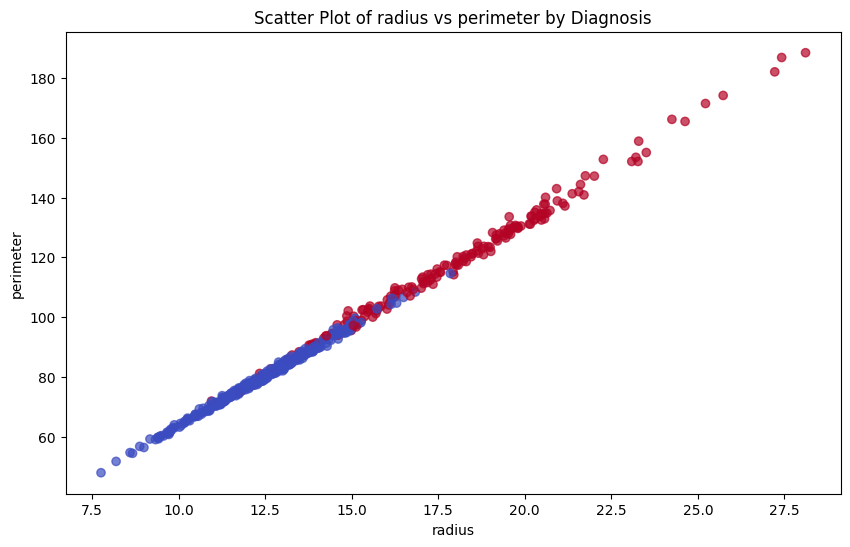

In [10]:
# this is using 2 features to show its grouping
# but in our KNN algorithm, were using many features and since we cannot visualize a multi-demensional
# plane

x_name = 'radius'
y_name = 'perimeter'

x_axis = df[x_name]
y_axis = df[y_name]
diagnosis = df['diagnosis'] # This is our Independent Varible

plt.figure(figsize=(10, 6))
scatter = plt.scatter(x_axis, y_axis, c=diagnosis, cmap='coolwarm', alpha=0.7)
plt.xlabel(x_name)
plt.ylabel(y_name)
plt.title(f'Scatter Plot of {x_name} vs {y_name} by Diagnosis')
plt.show()

Try changing the features: Still we can see the groupings

In [11]:
# Drop non-numeric variables
df.drop(["id", "name"], axis=1, inplace=True)
df.head()

,radius,texture,perimeter,area,smoothness,compactness,concavity,symmetry,fractal_dimension,age,diagnosis
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.08690,0.1812,0.05667,27,1
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.19740,0.2069,0.05999,31,1
4,20.29,14.34,135.1,1297.0,0.10030,0.13280,0.19800,0.1809,0.05883,20,1
6,18.25,19.98,119.6,1040.0,0.09463,0.10900,0.11270,0.1794,0.05742,38,1
10,16.02,23.24,102.7,797.8,0.08206,0.06669,0.03299,0.1528,0.05697,51,1


# Training the KNN Classifer Model

### Seperating/Splitting Dependent and Independent Variables

In [12]:
X = df.drop("diagnosis", axis = 1)
y = df["diagnosis"]

In [13]:
# 70% training data and 30% test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [14]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [15]:
y_pred=knn.predict(X_test)
print(f"Accuracy = {round((accuracy_score(y_test, y_pred) * 100), 2)}%")

Accuracy = 92.0%


In [18]:
print(f"Precision = {round(precision_score(y_test, y_pred)*100, 2)}")

Precision = 90.91


In [20]:
print(f"Recall = {round(recall_score(y_test, y_pred)*100, 2)}")

Recall = 87.72
